In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [88]:
vpm = pd.read_csv('vpm_main_2.csv')
prod = pd.read_csv('2024_production_2.csv')

In [89]:
#seperate the third perrault harvester from double. seperate pilot from perrault harvester 
machine3 = vpm[vpm['machine']== 3]
double = vpm[vpm['machine'] == 1]
pilot = vpm[vpm['machine'] == 2]

In [90]:
double

,Unnamed: 0,crop_year,machine,variety,is_mature,acres,vpm
0,0,2019,1,Simcoe,1,8.88,41.116
1,1,2019,1,Equinox,1,10.63,29.550
2,2,2019,1,Citra,1,18.78,28.604
3,3,2019,1,Experimental,1,18.58,39.782
4,4,2019,1,HBC 682,0,22.97,31.927
...,...,...,...,...,...,...,...
499,499,2023,1,Citra,1,NaN,26.313
500,500,2023,1,Sabro,1,NaN,23.137
501,501,2023,1,Idaho 7,1,NaN,14.587
502,502,2023,1,HBC 522,2,NaN,41.522


In [91]:
# Perrault machine dataframes
perrault_mature = double[double['is_mature'] == 1]
perrault_babies = double[double['is_mature'] == 0]

# Pilot machine datframe
pilot_mature = pilot[pilot['is_mature'] == 1]
pilot_babies = pilot[pilot['is_mature'] == 0]

In [92]:
#average picking time for mature 
perrault_speed_mature = perrault_mature.groupby(['variety', 'machine']).agg({'vpm': 'mean'}).reset_index().round(3)
pilot_speed_mature = pilot_mature.groupby(['variety', 'machine']).agg({'vpm' : 'mean'}).reset_index().round(3)

In [93]:
#average picking time for babies 
perrault_speed_babies = perrault_babies.groupby(['variety', 'machine']).agg({'vpm': 'mean'}).reset_index().round(3)
pilot_speed_babies = pilot_babies.groupby(['variety', 'machine']).agg({'vpm' : 'mean'}).reset_index().round(3)

In [94]:
# Seperate organic and conventional in production 
organic = prod[prod['is_organic']== 1]
conventional = prod[prod['is_organic']!= 1]

In [95]:
# Seperate mature and babies from conventional and organic production 
conventional_mature = conventional[conventional['is_mature']== 1]
conventional_babies = conventional[conventional['is_mature']!= 1]
organic_mature = organic[organic['is_mature']== 1]
organic_babies = organic[organic['is_mature']!= 1]

In [96]:
# group dataframes by variety
conventional_mature_variety = conventional_mature.groupby('variety')[['acres', 'strings']].sum().reset_index()
conventional_babies_variety = conventional_babies.groupby('variety')[['acres', 'strings']].sum().reset_index()
organic_babies_variety = organic_babies.groupby('variety')[['acres', 'strings']].sum().reset_index()
organic_mature_variety = organic_mature.groupby('variety')[['acres', 'strings']].sum().reset_index()

In [97]:
# Realign the dataframe for merg
conventional_mature_variety = conventional_mature_variety[['acres', 'strings', 'variety']]
conventional_babies_variety = conventional_babies_variety[['acres', 'strings', 'variety']]
organic_babies_variety = organic_babies_variety[['acres', 'strings', 'variety']]
organic_mature_variety = organic_mature_variety[['acres', 'strings', 'variety']]

Check Acreage 

In [98]:
cm = conventional_mature_variety['acres'].sum()

In [99]:
cb = conventional_babies_variety['acres'].sum()

In [100]:
ob = organic_babies_variety['acres'].sum()

In [101]:
om = organic_mature_variety['acres'].sum()

In [102]:
cm + cb + ob + om

1446.3239999999998

Merge Production (organic or conventional) with vpm (by machine)

In [103]:
#key
#conventional_mature_variety with perrault_speed_mature
#conventional_babies_variety with perrault_speed_babies
#organic_mature_variety with pilot_speed_mature
#organic_babies_variety with pilot_speed_babies

In [104]:
perrault_processing_mature = pd.merge(conventional_mature_variety, perrault_speed_mature, on = 'variety', how = 'left')
perrault_processing_babies = pd.merge(conventional_babies_variety, perrault_speed_babies, on = 'variety', how = 'left')
pilot_processing_mature = pd.merge(organic_mature_variety, pilot_speed_mature, on = 'variety', how = 'left')
pilot_processing_babies = pd.merge(organic_babies_variety, pilot_speed_babies, on = 'variety', how = 'left')

In [105]:
#organize
pilot_processing_mature = pilot_processing_mature[['variety', 'machine', 'acres', 'vpm', 'strings']]
pilot_processing_babies = pilot_processing_babies[['variety', 'machine', 'acres', 'vpm', 'strings']]
perrault_processing_mature = perrault_processing_mature[['variety', 'machine', 'acres', 'vpm', 'strings']]
perrault_processing_babies = perrault_processing_babies[['variety', 'machine', 'acres', 'vpm', 'strings']]

Fill in missing values

In [106]:
# perrault_processing_mature and pilot_processing_babies have 3 missing vpm.  add by either machine 3, average, or estimate
perrault_processing_mature.loc[2,'vpm'] = 19.349
perrault_processing_mature.loc[4,'vpm'] = 24.494
pilot_processing_babies.loc[1, 'vpm'] = 27.00
pilot_processing_babies.loc[1, 'machine'] = 2.0
perrault_processing_mature.loc[2,'machine'] = 1.0
perrault_processing_mature.loc[4,'machine'] = 1.0



In [107]:
#stack perrault_processing_mature and _babies
#stack pilot_processing_mature and _babies
harvest_perrault = pd.concat([perrault_processing_mature, perrault_processing_babies], axis = 0, ignore_index = True)
harvest_pilot = pd.concat([pilot_processing_mature, pilot_processing_babies], axis = 0, ignore_index = True)

In [108]:
#check acres 
harvest_perrault['acres'].sum() + harvest_pilot['acres'].sum()

1446.324

In [109]:
harvest_perrault.to_csv('harvester_perrault.csv')
harvest_pilot.to_csv('harvest_pilot.csv')

How many Perrault Machines Operating

In [85]:
harvest_perrault

,variety,machine,acres,vpm,strings,productive_minutes
0,Citra,1.0,130.42,34.977,247793.800,7084.478372
1,Experimental,1.0,30.20,47.169,53695.600,1138.366300
2,HBC 1019,1.0,4.89,19.349,10141.860,524.154220
3,HBC 522,1.0,16.00,12.150,33184.000,2731.193416
4,HBC 586,1.0,63.44,24.494,115744.480,4725.421736
5,HBC 638,1.0,14.85,15.637,26403.300,1688.514421
6,HBC 682,1.0,194.34,29.843,345536.520,11578.478035
7,Idaho 7,1.0,19.04,13.580,33853.120,2492.865979
8,Mosaic,1.0,205.49,26.546,365361.220,13763.324795
9,Palisade,1.0,28.99,21.092,41951.910,1988.996302


In [136]:
a = 480 # 8 hour Shift
b = 450 # 7.5 hour shifts
c = 540 # 9 hour shift
d = 600 # 10 hour shift
h = 690 # 11.5 hour shift

In [503]:
harvest_perrault['variety'].unique()

array(['Citra', 'Experimental', 'HBC 1019', 'HBC 522', 'HBC 586',
       'HBC 638', 'HBC 682', 'Idaho 7', 'Mosaic', 'Palisade', 'Sabro',
       'Simcoe', 'Talus'], dtype=object)

         variety          ShiftStart                   ShiftEnd   ShiftTime  \
0         Simcoe 2024-08-26 06:00:00 2024-08-26 14:00:00.000000  460.000000   
1         Simcoe 2024-08-26 14:00:00 2024-08-26 22:00:00.000000  460.000000   
2         Simcoe 2024-08-26 22:00:00 2024-08-27 06:00:00.000000  460.000000   
3         Simcoe 2024-08-27 06:00:00 2024-08-27 14:00:00.000000  460.000000   
4         Simcoe 2024-08-27 14:00:00 2024-08-27 22:00:00.000000  460.000000   
..           ...                 ...                        ...         ...   
65       HBC 586 2024-10-08 08:00:00 2024-10-08 16:00:00.000000  460.000000   
66       HBC 586 2024-10-08 16:00:00 2024-10-09 00:00:00.000000  460.000000   
67       HBC 586 2024-10-09 00:00:00 2024-10-09 08:00:00.000000  460.000000   
68       HBC 586 2024-10-09 08:00:00 2024-10-09 11:15:08.434719  195.140579   
69  Experimental 2024-10-10 08:00:00 2024-10-10 14:29:27.325998  379.455433   

    BreakTime  LunchBreak                   Week  S

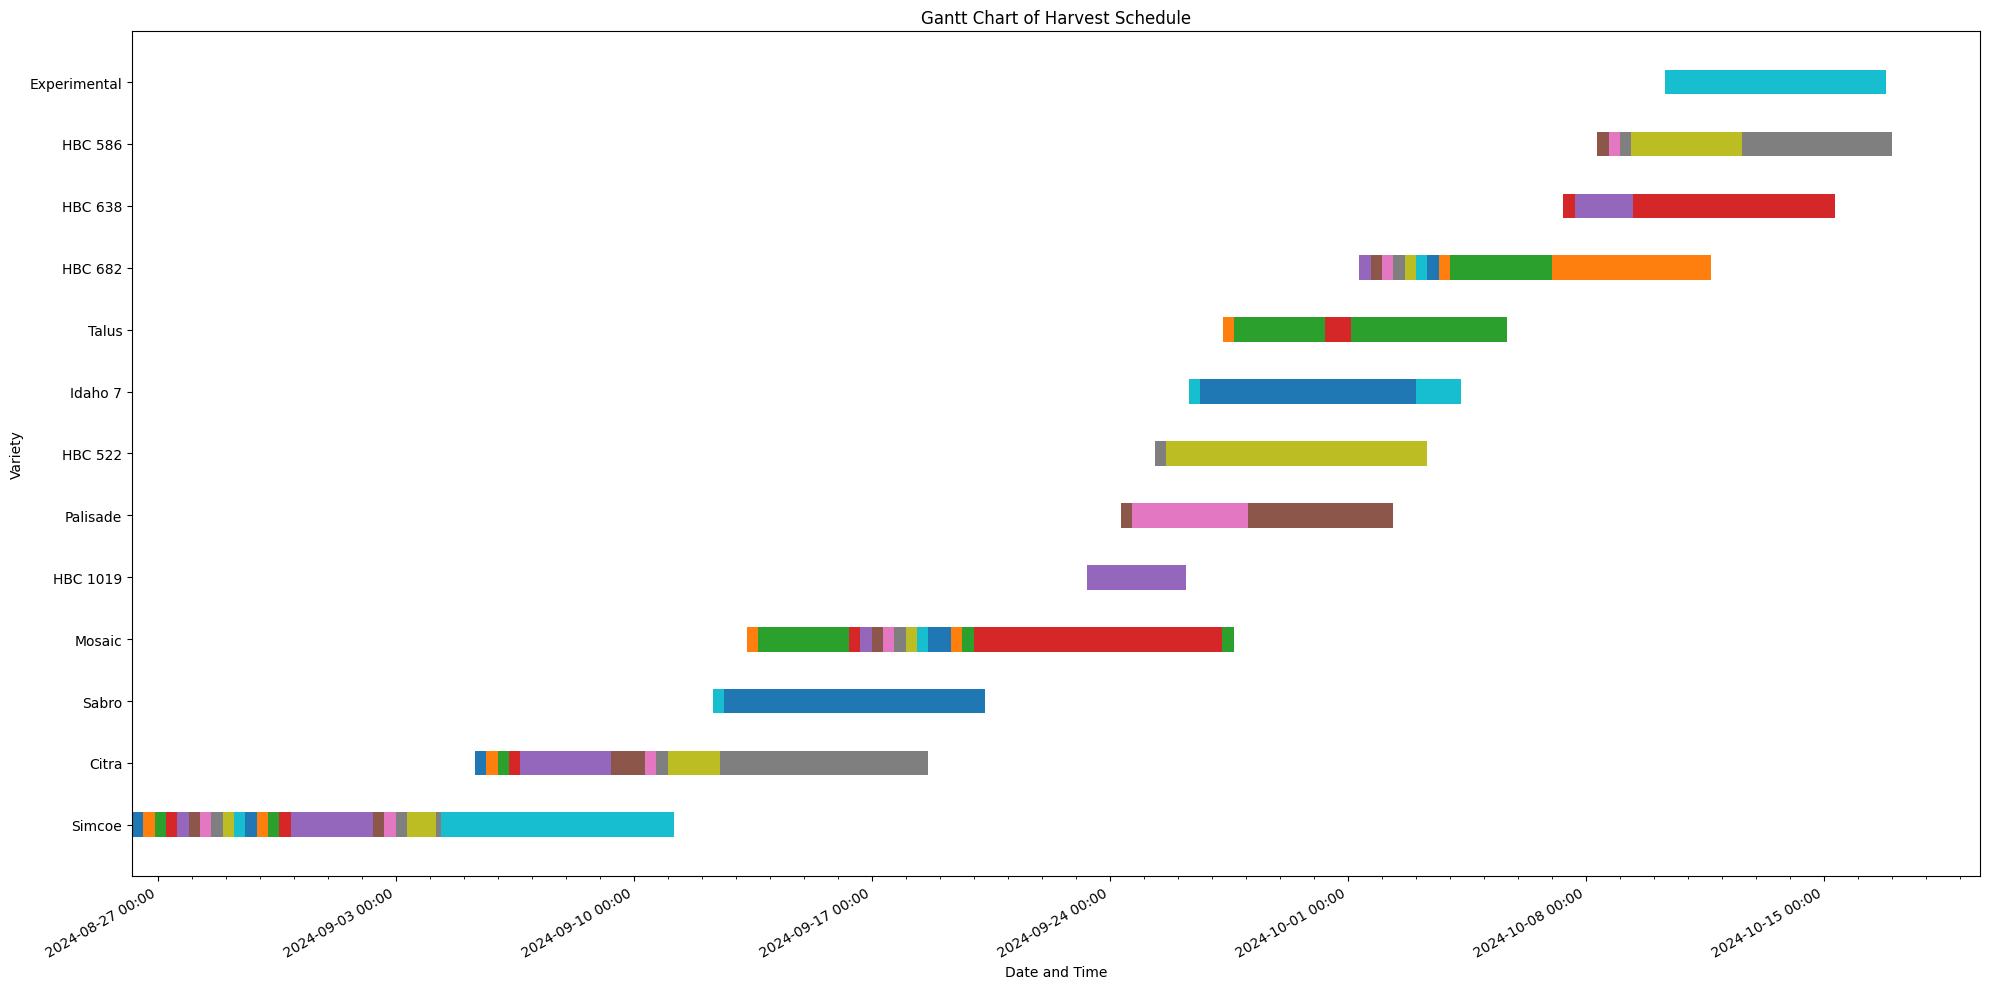

In [509]:
# Define the order in which varieties need to be picked
picking_order = [
    'Simcoe', 'Citra', 'Sabro', 'Mosaic', 'HBC 1019', 'Palisade', 'HBC 522', 'Idaho 7', 'Talus', 'HBC 682',
    'HBC 638', 'HBC 586', 'Experimental'
]

# Sort the DataFrame based on the picking order
harvest_perrault['order'] = harvest_perrault['variety'].apply(lambda x: picking_order.index(x))
harvest_perrault = harvest_perrault.sort_values(by='order')#.drop(columns='order')

def is_working_day(date):
    # Define working days (Monday to Friday)
    return date.weekday() < 5

def next_working_day(current_datetime):
    next_day = current_datetime + timedelta(days=1)
    while not is_working_day(next_day):
        next_day += timedelta(days=1)
    return next_day

def calculate_shift_time_with_breaks(total_minutes, work_period=240, break_duration=10, lunch_duration=30, shift_length=480):
    # Calculate the number of 10-minute breaks per shift
    num_breaks_per_shift = shift_length // work_period
    total_break_time_per_shift = num_breaks_per_shift * break_duration

    # Effective shift length excluding lunch
    effective_shift_length = shift_length - total_break_time_per_shift

    # Calculate the number of shifts needed
    num_shifts = (total_minutes // effective_shift_length) + 2

    return num_shifts, effective_shift_length, total_break_time_per_shift

def create_shift_schedule_with_breaks(data, start_datetime, shift_length=480, break_duration=10, lunch_duration=30):
    schedule = []
    current_datetime = start_datetime

    for index, row in data.iterrows():
        variety = row['variety']
        total_time = row['productive_minutes']

        num_shifts, effective_shift_length, total_break_time_per_shift = calculate_shift_time_with_breaks(
            total_time, shift_length=shift_length)

        while total_time > 0:
            if not is_working_day(current_datetime):
                current_datetime = datetime.combine(next_working_day(current_datetime), datetime.min.time()) + timedelta(hours=8)

            shift_end_time = current_datetime + timedelta(minutes=effective_shift_length + total_break_time_per_shift)

            if total_time > effective_shift_length:
                schedule.append({
                    'variety': variety,
                    'ShiftStart': current_datetime,
                    'ShiftEnd': shift_end_time,
                    'ShiftTime': effective_shift_length,
                    'BreakTime': total_break_time_per_shift,
                    'LunchBreak': lunch_duration if effective_shift_length >= 300 else 0
                })
                total_time -= effective_shift_length
            else:
                break_time = (total_time // 240) * break_duration
                shift_end_time = current_datetime + timedelta(minutes=total_time + break_time)
                schedule.append({
                    'variety': variety,
                    'ShiftStart': current_datetime,
                    'ShiftEnd': shift_end_time,
                    'ShiftTime': total_time,
                    'BreakTime': break_time,
                    'LunchBreak': 0 if total_time <= 300 else lunch_duration
                })
                total_time = 0

            current_datetime = shift_end_time

        # Move to the next working day for the next variety
        current_datetime = datetime.combine(next_working_day(current_datetime), datetime.min.time()) + timedelta(hours=8)

    return pd.DataFrame(schedule)

# Define the start date and time
start_datetime = datetime(2024, 8, 26, 6, 0)  # August 26, 2024, 06:00 AM

# Create the shift schedule with breaks
shift_schedule = create_shift_schedule_with_breaks(harvest_perrault, start_datetime)

# Add a week column to determine the pay period
shift_schedule['Week'] = shift_schedule['ShiftStart'].dt.to_period('W-SAT')

# Calculate the total hours per week
shift_schedule['ShiftHours'] = shift_schedule['ShiftTime'] / 60  # Convert minutes to hours
weekly_hours = shift_schedule.groupby('Week')['ShiftHours'].sum()  # Calculate total hours per week

# Calculate overtime hours per week
weekly_hours = weekly_hours.reset_index()
weekly_hours['OvertimeHours'] = weekly_hours['ShiftHours'].apply(lambda x: max(0, x - 40))

# Merge overtime hours back to the shift schedule
shift_schedule = shift_schedule.merge(weekly_hours[['Week', 'OvertimeHours']], on='Week', how='left')

# Display the shift schedule
print(shift_schedule)

# Plot the Gantt chart
fig, ax = plt.subplots(figsize=(20, 10))  # Increase the figure size

for i, variety in enumerate(shift_schedule['variety'].unique()):
    variety_shifts = shift_schedule[shift_schedule['variety'] == variety]
    for j, shift in variety_shifts.iterrows():
        ax.barh(variety, (shift['ShiftEnd'] - shift['ShiftStart']).total_seconds() / 3600, left=shift['ShiftStart'], height=0.4)

# Format the x-axis to show dates properly
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Set major ticks every 7 days
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Set minor ticks every 1 day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.gcf().autofmt_xdate()

ax.set_xlabel('Date and Time')
ax.set_ylabel('Variety')
ax.set_title('Gantt Chart of Harvest Schedule')
plt.tight_layout()
plt.show()










In [510]:
shift_schedule

,variety,ShiftStart,ShiftEnd,ShiftTime,BreakTime,LunchBreak,Week,ShiftHours,OvertimeHours
0,Simcoe,2024-08-26 06:00:00,2024-08-26 14:00:00.000000,460.000000,20.0,30,2024-08-25/2024-08-31,7.666667,75.000000
1,Simcoe,2024-08-26 14:00:00,2024-08-26 22:00:00.000000,460.000000,20.0,30,2024-08-25/2024-08-31,7.666667,75.000000
2,Simcoe,2024-08-26 22:00:00,2024-08-27 06:00:00.000000,460.000000,20.0,30,2024-08-25/2024-08-31,7.666667,75.000000
3,Simcoe,2024-08-27 06:00:00,2024-08-27 14:00:00.000000,460.000000,20.0,30,2024-08-25/2024-08-31,7.666667,75.000000
4,Simcoe,2024-08-27 14:00:00,2024-08-27 22:00:00.000000,460.000000,20.0,30,2024-08-25/2024-08-31,7.666667,75.000000
...,...,...,...,...,...,...,...,...,...
65,HBC 586,2024-10-08 08:00:00,2024-10-08 16:00:00.000000,460.000000,20.0,30,2024-10-06/2024-10-12,7.666667,1.957236
66,HBC 586,2024-10-08 16:00:00,2024-10-09 00:00:00.000000,460.000000,20.0,30,2024-10-06/2024-10-12,7.666667,1.957236
67,HBC 586,2024-10-09 00:00:00,2024-10-09 08:00:00.000000,460.000000,20.0,30,2024-10-06/2024-10-12,7.666667,1.957236
68,HBC 586,2024-10-09 08:00:00,2024-10-09 11:15:08.434719,195.140579,0.0,0,2024-10-06/2024-10-12,3.252343,1.957236
